In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap


In [54]:
graph = {}
nodes = set()
edges = []
with open('linky.txt','r',) as file:
    for line in file:
        stanice = line.split(':  ')[1].strip('\n').split(';')
        linka =  line.split(':  ')[0]
        #print(linka)
        for i,stanica in enumerate(stanice[:-1]):
            
            nodes.add(stanica)
            edges.append((stanice[i-1],stanica))
            if i != 0:
                try:
                    graph[stanice[i-1]][stanica] += 1
                except KeyError:
                    try:
                        graph[stanice[i-1]][stanica] = 1
                    except KeyError:
                        graph[stanice[i-1]] = {}
                        graph[stanice[i-1]][stanica] = 1

G = nx.DiGraph()
for node in graph:
    for neigbour in graph[node]:
        G.add_edges_from([(node,neigbour)], weight = graph[node][neigbour])

In [55]:
def find_shortest_path_with_transfers(graph, start, end):
    try:
        shortest_path = nx.shortest_path(graph, start, end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

In [56]:
Gb = nx.Graph()
line_counters = {}

with open('linky.txt', 'r') as file:
    for line in file:
        parts = line.strip().split(":")
        link_number = parts[0].strip()
        stops = [stop.strip() for stop in parts[1].split(";")][:-1]
        #print(stops)
        Gb.add_node(link_number, bipartite = 0)
        Gb.add_nodes_from(stops, bipartite = 1)
        for stop in stops:
            Gb.add_edge(link_number, stop)



In [57]:
least_transfer = {station: {} for station in G.nodes()}
for station1 in G.nodes():
    for station2 in G.nodes():
        if station1 != station2:
            path = find_shortest_path_with_transfers(Gb, station1, station2)
            least_transfer[station1][station2] = path 
            least_transfer[station2][station1] = path[::-1]
        

In [58]:
number_of_transfers = {station: {} for station in G.nodes()}
for station1 in G.nodes():
    for station2 in G.nodes:
        number_of_transfers[station1][station2] = -1
        if station1 != station2:
            path = least_transfer[station1][station2]
            for element in path:
                try:
                    int(element)
                    number_of_transfers[station1][station2] += 1
                except ValueError:
                    continue
        else:
            number_of_transfers[station1][station2] = 0

In [59]:
print(number_of_transfers["Riviéra"]["Nad lúčkami"])
print(number_of_transfers["Nad lúčkami"]["Cintorín Slávičie"])
print(number_of_transfers["Danubiana"]["Hrad Devín"])
print(least_transfer["Danubiana"]["Hrad Devín"])


0
1
2
['Danubiana', '90', 'Landererova', '50', 'Most SNP', '29', 'Hrad Devín']


In [60]:
trans = []
combinations = 0
sum_of_transfers = 0
for station1 in G.nodes():
    for station2 in G.nodes():
        value = number_of_transfers[station1][station2]
        sum_of_transfers +=  value
        trans.append(value)
        combinations += 1
print(sum_of_transfers/combinations)


1.4457648005633519


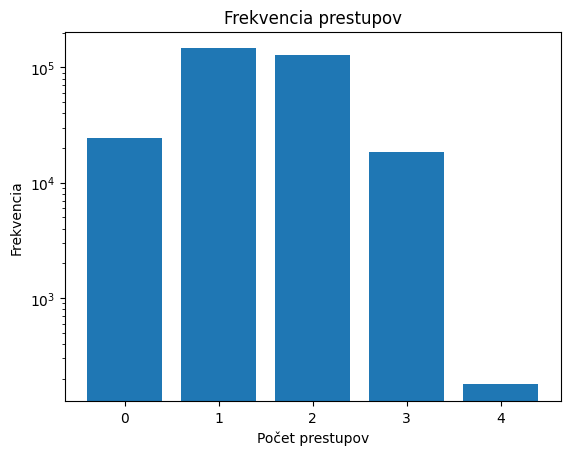

In [61]:
unique_values = sorted(set(trans))

# Calculate the width of each bin
bin_width = 1

# Create a frequency plot
plt.hist(trans, bins=[val - bin_width / 2 for val in unique_values] + [unique_values[-1] + bin_width / 2], align='mid', rwidth=0.8)
plt.xlabel('Počet prestupov')
plt.ylabel('Frekvencia')
plt.yscale("log")
plt.title('Frekvencia prestupov')
plt.xticks(unique_values)
plt.show()